<a href="https://colab.research.google.com/github/rodrigobertinii/Alteracoes_climaticas_mundiais/blob/main/Altera%C3%A7%C3%B5es_clim%C3%A1ticas_mundiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ALTERAÇÕES CLIMÁTICAS MUNDIAIS**

Bem-vindo ao banco de dados sobre mudanças climáticas globais! Aqui, você encontrará informações relevantes sobre os impactos climáticos nas capitais de diversos países, com dados atualizados diariamente. Enfase especial  ao Brasil, considerando a diversidade de desafios que enfrentamos em nosso território. Espero que este conteúdo desperte sua curiosidade e que você compartilhe suas impressões comigo nas redes sociais!

Este banco de dados contém informações sobre temperatura, umidade, precipitação, velocidade do vento, pressão atmosférica, entre outros parâmetros, fornecendo detalhes específicos de cada região do planeta.

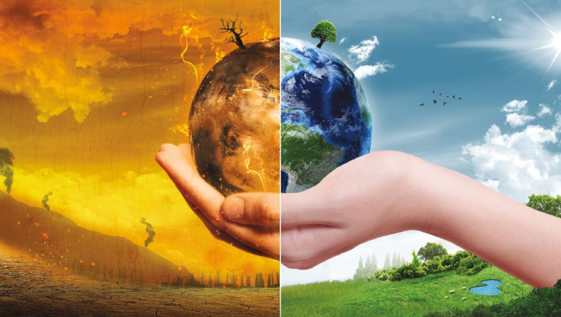

Importação das bibliotecas necessárias para este Notebook.


*   **pandas** e **numpy** são usadas para manipulação e análise de dados
*   **seaborn**, **matplotlib.pyplot**, **plotly.express** e **plotly.graph_objects** são utilizadas para visualização de dados.

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Leitura do banco de dados Global Weather Repository

https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository

In [105]:
clima = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos GitHub/Alterações climáticas mundiais/GlobalWeatherRepository.csv')
pd.set_option('display.max_columns', None)

Analisar as 4 linhas desse banco de dados

In [106]:
clima.sample(4)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
25174,Saint Vincent and the Grenadines,Kingstown,13.13,-61.22,America/St_Vincent,1727084700,2024-09-23 05:45,29.3,84.8,Partly Cloudy,13.2,21.2,78,ENE,1011.0,29.84,0.00,0.0,72,43,34.0,93.3,10.0,6.0,1.0,17.9,28.8,252.046,36.0,1.8,1.8,10.082,18.903,1,1,05:54 AM,06:00 PM,10:52 PM,11:21 AM,Waning Gibbous,69
14449,Saint Lucia,Castries,14.00,-61.00,America/St_Lucia,1722342600,2024-07-30 08:30,28.1,82.6,Patchy rain nearby,12.3,19.8,90,E,1016.0,30.01,0.01,0.0,74,71,31.6,88.8,10.0,6.0,6.0,15.2,24.5,170.200,49.4,0.1,0.1,1.100,4.400,1,1,05:48 AM,06:33 PM,01:11 AM,02:35 PM,Waning Crescent,30
10055,Somalia,Mogadishu,2.07,45.37,Africa/Mogadishu,1720183500,2024-07-05 15:45,28.2,82.8,Partly cloudy,18.6,29.9,210,SSW,1010.0,29.83,0.01,0.0,79,50,31.8,89.3,10.0,6.0,6.0,22.0,35.4,213.600,44.0,0.1,0.1,1.200,3.800,1,1,05:56 AM,06:10 PM,05:14 AM,05:51 PM,New Moon,1
19032,Dominican Republic,Santo Domingo,18.47,-69.90,America/Santo_Domingo,1724415300,2024-08-23 08:15,28.1,82.6,Partly cloudy,4.3,6.8,60,ENE,1015.0,29.97,0.04,0.0,84,75,33.9,93.1,10.0,6.0,6.0,12.9,20.8,247.000,9.7,6.3,2.1,4.100,5.700,1,1,06:23 AM,07:01 PM,10:03 PM,10:11 AM,Waning Gibbous,85


Excluir as colunas que não serão utilizadas nessa análise

In [107]:
#deletar todas as colunas que eu não for usar.
#pensar se irei deletar a precip_mm, feels_like_celsius, ir_quality_Carbon_Monoxide,
#air_quality_Ozone, air_quality_Nitrogen_dioxide, air_quality_Sulphur_dioxide,
#air_quality_PM2.5, air_quality_PM10, air_quality_us-epa-index,
colunas_drop = ['last_updated_epoch','temperature_fahrenheit','condition_text',
                'wind_mph','wind_degree','pressure_mb','pressure_in',
                'precip_in','cloud','feels_like_celsius',
                'feels_like_fahrenheit','visibility_km', 'visibility_miles',
                'uv_index','gust_mph','gust_kph','air_quality_Carbon_Monoxide',
                'air_quality_Ozone','air_quality_Nitrogen_dioxide',
                'air_quality_Sulphur_dioxide','air_quality_PM2.5',
                'air_quality_PM10','air_quality_us-epa-index',
                'air_quality_gb-defra-index','moonrise', 'moonset',
                'moon_phase','moon_illumination']
clima.drop(columns=colunas_drop, inplace=True)

Após a exclusão, exibir três linhas do banco de dados.

In [108]:
clima.sample(3)

,country,location_name,latitude,longitude,timezone,last_updated,temperature_celsius,wind_kph,wind_direction,precip_mm,humidity,sunrise,sunset
21717,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,2024-09-06 08:15,30.2,15.1,E,0.01,75,05:55 AM,06:16 PM
22918,China,Beijing,39.93,116.39,Asia/Shanghai,2024-09-12 20:15,19.3,3.6,N,0.00,83,05:53 AM,06:28 PM
10534,Eritrea,Asmara,15.33,38.93,Africa/Asmara,2024-07-08 16:00,22.3,12.6,NNE,0.70,50,06:00 AM,06:59 PM


Analisar a quantidade de linhas e colunas

In [109]:
linhas, colunas = clima.shape
print(f'O banco de dados possui {linhas} linhas e {colunas} colunas')

O banco de dados possui 31437 linhas e 13 colunas


Ver os nomes das colunas

In [110]:
clima.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated', 'temperature_celsius', 'wind_kph', 'wind_direction',
       'precip_mm', 'humidity', 'sunrise', 'sunset'],
      dtype='object')

Nomes dos paises que estão presentes no banco de dados

In [111]:
clima['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Madagascar', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Comoros',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Swaziland', 'Ethiopia', 'Fiji Islands', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau

Substituir os nomes incorretos no banco de dados pelos corretos.

In [112]:
clima['country'].replace(['Marrocos','Saudi Arabien','Saint-Vincent-et-les-Grenadines', 'Estonie', 'Jemen', 'Letonia'],
                          ['Morocco', 'Saudi Arabia','Saint Vincent and the Grenadines', 'Estonia','Yemen','Latvia'])

,country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
31432,Venezuela
31433,Vietnam
31434,Yemen
31435,Zambia


Mostrar os valores unicos das colunas country, location_name e timezone

In [113]:
colunas = ['country', 'location_name', 'timezone']
for col in clima[colunas]:
  print(col)
  print(clima[col].unique())
  print('-'*100)

country
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan

Ver cabeçalho

In [114]:
clima.head(0)

,country,location_name,latitude,longitude,timezone,last_updated,temperature_celsius,wind_kph,wind_direction,precip_mm,humidity,sunrise,sunset


Ver o tipo de cada coluna

In [115]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31437 entries, 0 to 31436
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              31437 non-null  object 
 1   location_name        31437 non-null  object 
 2   latitude             31437 non-null  float64
 3   longitude            31437 non-null  float64
 4   timezone             31437 non-null  object 
 5   last_updated         31437 non-null  object 
 6   temperature_celsius  31437 non-null  float64
 7   wind_kph             31437 non-null  float64
 8   wind_direction       31437 non-null  object 
 9   precip_mm            31437 non-null  float64
 10  humidity             31437 non-null  int64  
 11  sunrise              31437 non-null  object 
 12  sunset               31437 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 3.1+ MB



A coluna last_updated será dividida em três colunas: uma para o ano, outra para o mês e a última para o dia, respectivamente.

In [116]:
clima['last_updated'] = pd.to_datetime(clima['last_updated'])
clima['year'] = clima['last_updated'].dt.year
clima['month'] = clima['last_updated'].dt.month
clima['day'] = clima['last_updated'].dt.day

In [117]:
clima['day'] = clima['day'].astype(int)

In [118]:
clima['month'] = clima['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])

Rever os tipos de dados

In [119]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31437 entries, 0 to 31436
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   country              31437 non-null  object        
 1   location_name        31437 non-null  object        
 2   latitude             31437 non-null  float64       
 3   longitude            31437 non-null  float64       
 4   timezone             31437 non-null  object        
 5   last_updated         31437 non-null  datetime64[ns]
 6   temperature_celsius  31437 non-null  float64       
 7   wind_kph             31437 non-null  float64       
 8   wind_direction       31437 non-null  object        
 9   precip_mm            31437 non-null  float64       
 10  humidity             31437 non-null  int64         
 11  sunrise              31437 non-null  object        
 12  sunset               31437 non-null  object        
 13  year                 31437 non-

Analisar se o banco de dados possui dados duplicados

In [120]:
clima.duplicated().sum()

0

Analisar se o banco de dados possui dados vazios

In [121]:
clima.isna().sum().sum()

0

Análise estatística dos dados numéricos e categóricos de cada coluna.

In [122]:
numericos = clima.describe(include=np.number)
categoricos = clima.describe(include="object")

In [123]:
numericos

,latitude,longitude,temperature_celsius,wind_kph,precip_mm,humidity,year,day
count,31437.000000,31437.000000,31437.000000,31437.000000,31437.000000,31437.000000,31437.0,31437.000000
mean,19.138228,22.054663,25.585495,13.745803,0.159165,61.236537,2024.0,16.010275
std,24.487220,65.814098,7.225115,18.705494,0.655717,25.007333,0.0,8.679139
min,-41.300000,-175.200000,-10.400000,3.600000,0.000000,2.000000,2024.0,1.000000
25%,3.750000,-6.840000,22.000000,6.800000,0.000000,42.000000,2024.0,9.000000
50%,17.250000,23.320000,26.400000,12.200000,0.000000,66.000000,2024.0,16.000000
75%,40.400000,50.580000,29.700000,19.100000,0.040000,82.000000,2024.0,23.000000
max,64.150000,179.220000,49.200000,2963.200000,27.820000,100.000000,2024.0,31.000000


In [124]:
categoricos

,country,location_name,timezone,wind_direction,sunrise,sunset,month
count,31437,31437,31437,31437,31437,31437,31437
unique,210,248,190,16,340,410,6
top,Bulgaria,Kabul,Asia/Bangkok,E,05:56 AM,06:02 PM,August
freq,356,162,595,2775,449,321,6045


Criação de um boxplot para identificar os outliers da temperatura no território brasileiro.

In [125]:
brazil = clima.query('country == "Brazil"')

<Axes: ylabel='temperature_celsius'>

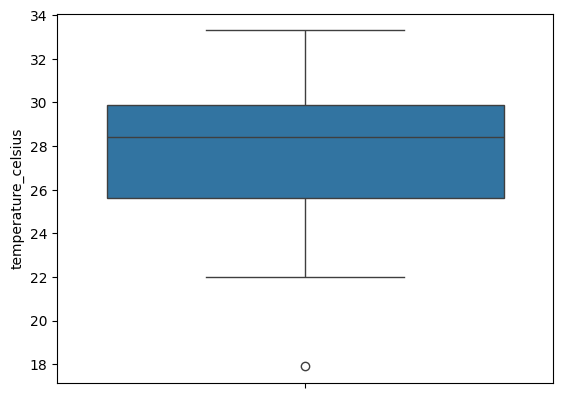

In [126]:
sns.boxplot(brazil['temperature_celsius'])

Análise estatística dos dados referentes ao Brasil.

In [127]:
brazil['temperature_celsius'].describe()

,temperature_celsius
count,161.000000
mean,27.895031
std,2.718773
min,17.900000
25%,25.600000
50%,28.400000
75%,29.900000
max,33.300000


Criação de um função para identificar e remover outliers (valores discrepantes) da coluna de temperatura no Brasil

In [128]:
def calc_outliers(column, dataframe):
  Q1 = dataframe[column].quantile(0.25)
  Q3 = dataframe[column].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  outliers = dataframe[(dataframe[column] < limite_inferior) | (dataframe[column] > limite_superior)]
  dataframe = dataframe.drop(outliers.index, inplace=True)
  return

In [129]:
calc_outliers('temperature_celsius', brazil)

<ipython-input-128-12493c5887eb>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: ylabel='temperature_celsius'>

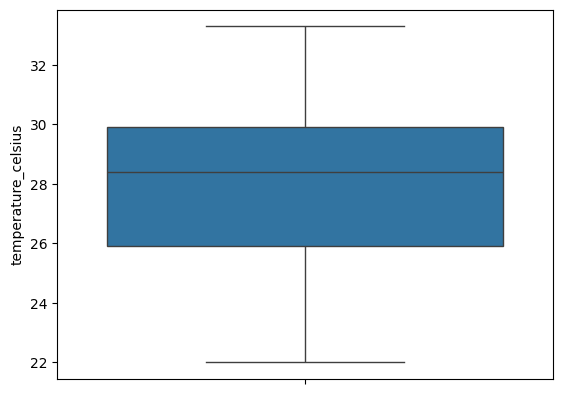

In [130]:
sns.boxplot(brazil['temperature_celsius'])

Agora o boxplot esta sem outliers

Calcular a média da temperatura no mundo e no Brasil.

In [131]:
media_temperatura_global = clima['temperature_celsius'].mean()
media_temperatura_brazil = brazil['temperature_celsius'].mean()
print(f'A média da temperatura global é de {media_temperatura_global:.2f} graus Celsius')
print(f'A média da temperatura no Brasil é de {media_temperatura_brazil:.2f} graus Celsius')

A média da temperatura global é de 25.59 graus Celsius
A média da temperatura no Brasil é de 27.96 graus Celsius


In [132]:
gauge_chart = go.Figure()

gauge_chart.add_trace(go.Indicator(
    domain={'x': [0, 0.5], 'y': [0, 1]},
    value=media_temperatura_brazil,
    mode="gauge+number",
    title={'text': 'Temperatura Média (Brasil)'},
    gauge={'axis': {'range': [None, 30]},
           'bar': {'color': "red"},
           'steps': [
               {'range': [0, 10], 'color': "lightgray"},
               {'range': [10, 20], 'color': "gray"},
           ]}
))

gauge_chart.add_trace(go.Indicator(
    domain={'x': [0.55, 1], 'y': [0, 1]},
    value=media_temperatura_global,
    mode="gauge+number",
    title={'text': 'Temperatura Média (Global)'},
    gauge={'axis': {'range': [None, 30]},
           'bar': {'color': "blue"},
           'steps': [
               {'range': [0, 10], 'color': "lightgray"},
               {'range': [10, 20], 'color': "gray"},
           ]}
))
gauge_chart.show()


Dessa maneira, mostra que a temperatura média no Brasil é maior do que a média de todos os países.

Ordem decrescente dos países com as maiores temperaturas médias.

In [133]:
clima_ordenado = clima.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False).reset_index()
clima_ordenado.head(10)

,country,temperature_celsius
0,Saudi Arabien,45.000000
1,Iraq,41.177778
2,Saudi Arabia,40.983851
3,Kuwait,40.814198
4,Marrocos,40.300000
5,Qatar,38.345342
6,Turkménistan,37.800000
7,United Arab Emirates,36.833333
8,Bahrain,36.097531
9,Djibouti,35.721250


Criação de dois gráficos comparando os países com as maiores e menores temperaturas médias.

In [134]:
clima_ordenado = pd.DataFrame(clima_ordenado)
clima_ordenado.columns

Index(['country', 'temperature_celsius'], dtype='object')

In [135]:
temp_media_maior_TOP50 = px.bar(clima_ordenado.head(50),
                    x='country',
                    y='temperature_celsius',
                    title='Temperatura média dos 50 países com as maiores médias.',
                    color='temperature_celsius',
                    color_continuous_scale=['orange', 'red'])
temp_media_maior_TOP50.show()

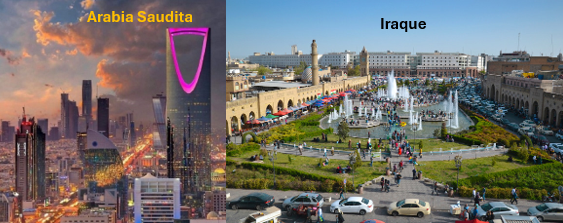

In [136]:
clima_ordenado = clima.groupby('country')['temperature_celsius'].mean().sort_values(ascending=True).reset_index()
clima_ordenado.head(10)

,country,temperature_celsius
0,Chile,7.017391
1,Australia,7.105556
2,Iceland,8.435185
3,United States of America,10.803145
4,New Zealand,10.930864
5,Ecuador,11.364596
6,Argentina,11.388199
7,Uruguay,11.580247
8,Mongolia,13.292547
9,Colombia,13.500000


In [137]:
temp_media_menor_TOP50 = px.bar(clima_ordenado.head(50),
                    x='country',
                    y='temperature_celsius',
                    title='Temperatura média dos 50 países com as menores médias.',
                    color='temperature_celsius',
                    color_continuous_scale=['lightblue', 'blue'])
temp_media_menor_TOP50.show()

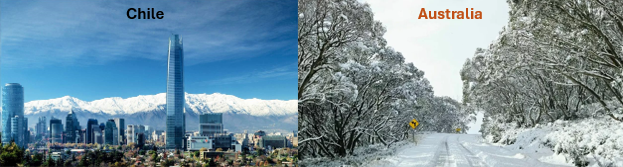

Analisar a posição do Brasil no ranking dos países com as maiores temperaturas médias.

In [138]:
posicao_brazil = clima_ordenado.loc[clima_ordenado['country'] == 'Brazil'].index[0] + 1
print(f'Brasil é o {posicao_brazil}º país com maior temperatura média')

Brasil é o 133º país com maior temperatura média


Analisar a distribuição das temperaturas no Brasil.

In [139]:
histograma = px.histogram(brazil, x='temperature_celsius', nbins=10, title='Distribuição de temperatura no Brasil')
histograma.show()

O histograma revela a grande variação de temperatura no Brasil, devido principalmente ao vasto tamanho do território e à diversidade de biomas em suas diferentes regiões.

Comparar as médias de temperatura na América do Sul em cada mês

In [140]:
america_do_sul = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
clima_america_do_sul = clima[clima['country'].isin(america_do_sul)]

In [141]:
clima_america_do_sul_mes = clima_america_do_sul.groupby(['month','country'])['temperature_celsius'].mean().reset_index()
clima_america_do_sul_mes
clima_america_do_sul_mes['month'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

,month
0,August
1,August
2,August
3,August
4,August
...,...
62,September
63,September
64,September
65,September


In [142]:
fig = px.line(clima_america_do_sul_mes, x='month',y='temperature_celsius',
              title="Média da temperatura em cada mes na america do sul",color="country",markers=True)
fig.update_xaxes(title="Meses")
fig.update_yaxes(title="Temperature (°C)")

fig.update_traces(
    textposition='top center',
    textfont=dict(size=12),
)

fig.update_layout(
    legend_title_text='Países',
     height=600,
    width=1000
)

fig.update_traces(
    line=dict(width=3),
    marker=dict(size=12, line=dict(width=1, color='DarkSlateGrey')),
)

fig.show()

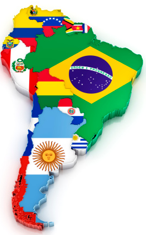

O gráfico mostra que no ano de 2024, na maioria dos meses, o Brasil apresentou os maiores valores de temperatura média da América do Sul

Analisar a velocidade do vento em cada país da América do Sul.

In [143]:
vento_america_do_sul = clima_america_do_sul.groupby(['country', 'month'])['wind_kph'].mean().reset_index().sort_values(by='wind_kph', ascending=False)
vento_america_do_sul
vento_america_do_sul['month'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)
vento_america_do_sul['meses'] = vento_america_do_sul['month'].replace(["May", "June", "July", "August","September", "October"],["Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro"])

<ipython-input-143-58fe00de4b95>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [144]:
barchart = px.bar(vento_america_do_sul, x="country", y="wind_kph", title="Velocidade do vento América do Sul", color="meses", height=600)
barchart.update_xaxes(title="Países")
barchart.update_yaxes(title="Velocidade Vento (km/h)")

barchart.update_traces(texttemplate="%{y:.2f}km/h", textposition="inside")
barchart.update_layout(showlegend=True)
barchart.update_traces(marker=dict(line=dict(color='rgb(0,0,0)', width=0.3)))
barchart.update_traces(hovertemplate="<b>%{x}</b><br>Velocidade Vento: %{y:.2f}km/h")
barchart.update_layout(legend_title_text='Meses')

barchart.show()

O Uruguai é o país que apresenta a maior velocidade de vento em todos os meses analisados.

Analisar a direções dos ventos no territorio brasileiro em km/h e sua intensidade de temperatura.

In [145]:
fig = px.scatter_polar(
    brazil,
    r="wind_kph",
    theta="wind_direction",
    color="temperature_celsius",
    color_continuous_scale = "viridis",
    title="Velocidade e direção dos ventos",
    labels={'temperature_celsius': 'Temperature (°C)'},
    height=600,
    hover_name="country",
)

fig.show()

As duas regiões com maior incidência de ventos são:

*   East-Northeast (ENE) = Entre o leste e o nordeste
*   East (E) = Leste

Em seguida, as direções com menor incidência são:

*   North-East (NE) = Nordeste
*   North-North-East (NNE) = Entre o norte e o nordeste

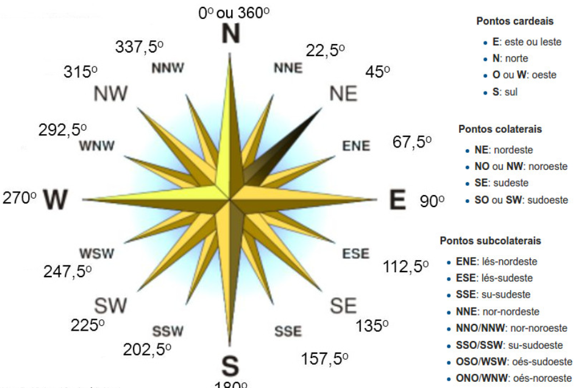

Analisar os países com os maiores e menores índices pluviométricos registrados no mundo, com base nos meses e ano analisados.



In [146]:
precip_max = clima.loc[clima['precip_mm'].idxmax()]
precip_min = clima.loc[clima['precip_mm'].idxmin()]
precip_max['country']
print(f'O pais com maior registro de indice fluviométrico é {precip_max["country"]} com {precip_max["precip_mm"]} mm')
print(f'O pais com menor registro de indice fluviométrico é {precip_min["country"]} com {precip_min["precip_mm"]} mm')

O pais com maior registro de indice fluviométrico é Vietnam com 27.82 mm
O pais com menor registro de indice fluviométrico é Afghanistan com 0.0 mm


Analisar o país com o mais e menos umido do mundo com base nos meses e ano analisados.

In [147]:
umidade_max = clima.loc[clima['humidity'].idxmax()]
umidade_min = clima.loc[clima['humidity'].idxmin()]
precip_max['country']
print(f'O pais com mais úmido é {umidade_max["country"]} com {umidade_max["precip_mm"]} mm')
print(f'O pais com menos úmido é {umidade_min["country"]} com {umidade_min["precip_mm"]} mm')

O pais com mais úmido é Costa Rica com 0.17 mm
O pais com menos úmido é Namibia com 0.0 mm


ALterar a coluna sunrise e sunset para o formato de horas e minutos

In [148]:
clima['sunrise'] = pd.to_datetime(clima['sunrise'], format='%I:%M %p')
clima['sunrise'] = clima['sunrise'].dt.strftime('%H:%M')
clima['sunset'] = pd.to_datetime(clima['sunset'], format='%I:%M %p')
clima['sunset'] = clima['sunset'].dt.strftime('%H:%M')

Fazer um grafico de calor (heatmap) com a correção entre algumas colunas do banco de dados

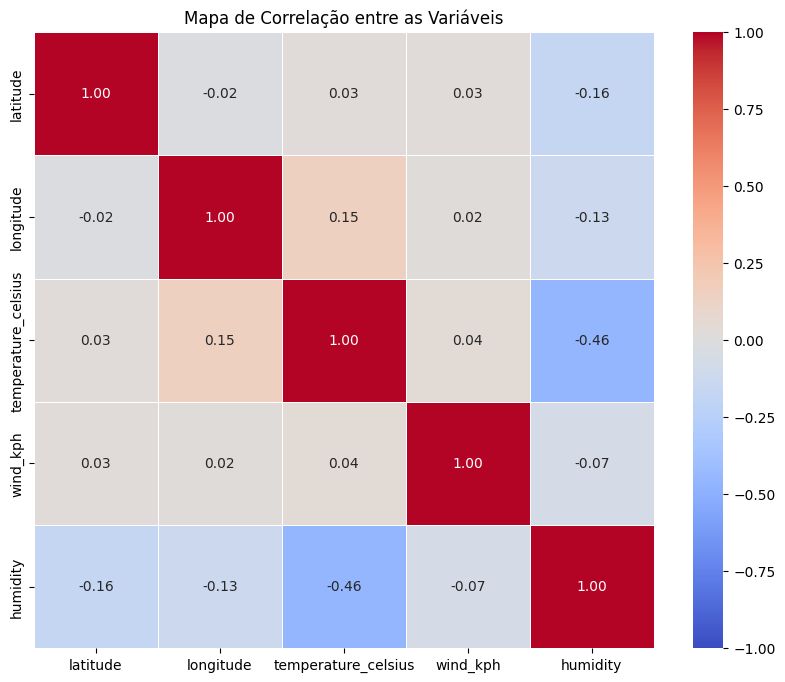

In [149]:
clima_correlacao = clima[['latitude','longitude','temperature_celsius','wind_kph','humidity']]

correlacao = clima_correlacao.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

plt.title('Mapa de Correlação entre as Variáveis')
plt.show()

Os dados que apresentam maior correlação são a temperatura e a umidade, pois quando uma aumenta, a outra tende a aumentar.

Analisar os países com os maiores índices de precipitação.

In [150]:
clima_media_precipitacao_alta_TOP20 = clima.groupby('country').agg({'precip_mm': 'mean'}).sort_values(by='precip_mm', ascending=False).head(20)
clima_media_precipitacao_alta_TOP20 = clima_media_precipitacao_alta_TOP20.reset_index(drop=False)

In [151]:
clima_media_precipitacao_alta_TOP20

,country,precip_mm
0,Lao People's Democratic Republic,1.970000
1,Letonia,1.830000
2,Malásia,1.550000
3,Sierra Leone,0.907750
4,Guinea,0.717901
5,Nepal,0.679068
6,Liberia,0.668509
7,Myanmar,0.660556
8,Ethiopia,0.634312
9,Sri Lanka,0.619379


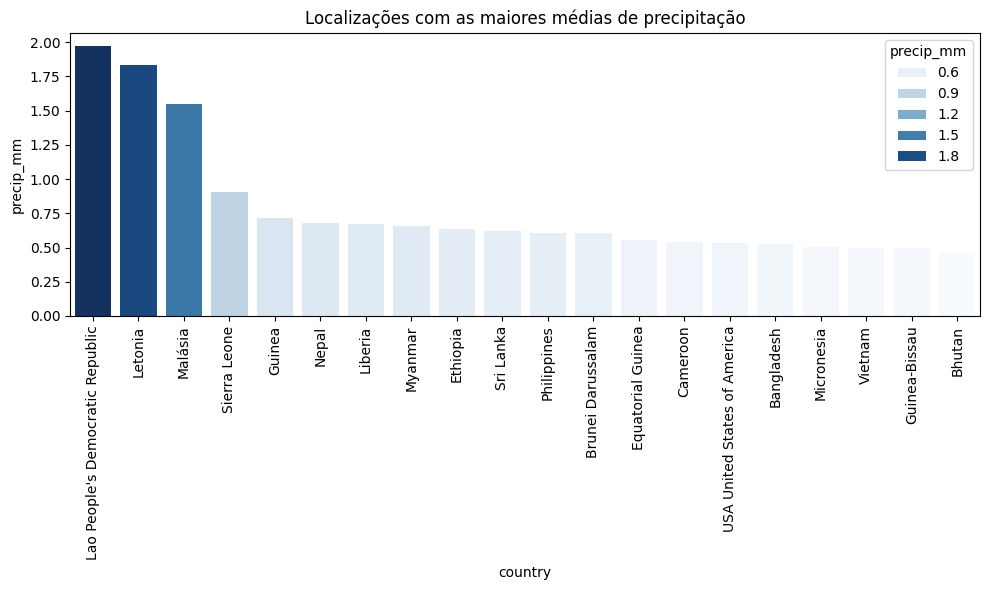

In [152]:
fig, my_ax = plt.subplots(figsize=(10,6))

sns.barplot(data = clima_media_precipitacao_alta_TOP20, x=clima_media_precipitacao_alta_TOP20['country'], y=clima_media_precipitacao_alta_TOP20['precip_mm'], ax=my_ax, palette='Blues', hue=clima_media_precipitacao_alta_TOP20['precip_mm'])
plt.xticks(rotation=90)

plt.grid(linestyle='')
plt.title('Localizações com as maiores médias de precipitação')
plt.tight_layout()
plt.show()

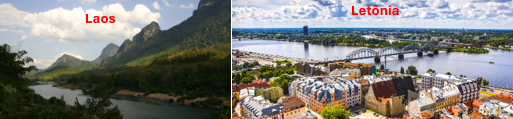

In [153]:
clima.to_csv('clima.csv', index=False)

In [154]:
brazil.to_csv('brazil.csv', index=False)

In [155]:
clima_america_do_sul_mes.to_csv('clima_america_do_sul_mes.csv', index=False)

In [156]:
vento_america_do_sul.to_csv('vento_america_do_sul.csv', index=False)